In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import train_test_split as tts


In [171]:
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().any()

False

In [172]:
df['Pregnancies'].nunique()  # checking whaether it is classifier

17

In [173]:
cd=[] #for caracterstick data but thereis no charater stick data
nd=[]  #for numericc data
nd=df.copy()

In [174]:
nd # which is same as df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [175]:
# dividin data in random variable fortest train

X=nd.drop('Outcome',axis=1)

In [176]:
Y=df['Outcome']

In [177]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [178]:
scal=StandardScaler();
X=scal.fit_transform(X)
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.20,random_state=42)

In [179]:
xtrain


array([[-0.54791859, -1.15469351, -3.57259724, ..., -4.06047387,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.27837344,  0.66661825, ..., -0.48135115,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56664949, -1.19450074, ..., -0.41789153,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred1=lr.predict(xtest)
ac1=ac(ypred1,ytest)
ac1

0.7532467532467533

In [84]:
from sklearn import svm
svm=svm.SVC()
svm.fit(xtrain,ytrain)
pred2=svm.predict(xtest)
ac2=ac(pred2,ytest)
ac2

0.7272727272727273

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pred3=knc.predict(xtest)
ac3=ac(pred3,ytest)
ac3

0.6883116883116883

In [91]:
result1=pd.DataFrame({'Model':['Logistic Reg','SVC','Kneibour'],'Accuracy':[ac1,ac2,ac3]})

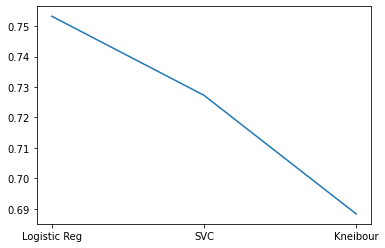

In [93]:
mpt.plot(result1['Model'],result1['Accuracy'])

C:\Users\dell\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

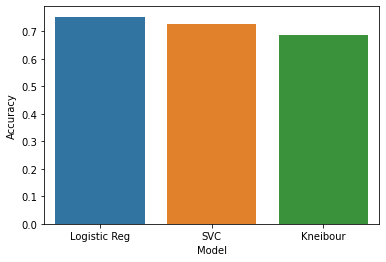

In [95]:
sb.barplot(result1['Model'],result1['Accuracy'])

In [112]:
# best linear model is SVC

In [133]:
newX=df.drop('Outcome',axis=1)
newX
newY=df['Outcome']

In [134]:
xtrain,xtest,ytrain,ytest=tts(newX,newY,test_size=0.20,random_state=42)
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [135]:
# non linear model
# 1. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
pred4=dtc.predict(xtest)
ac4=ac(pred4,ytest)
ac4

0.7402597402597403

In [136]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred5=rfc.predict(xtest)
ac5=ac(pred5,ytest)
ac5

0.7467532467532467

In [137]:
# 3. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
pred6=gbc.predict(xtest)
ac6=ac(pred6,ytest)
ac6

0.7467532467532467

In [138]:
result=pd.DataFrame({'Model':['Logistic Reg','SVC','Kneibour','Dision Tree','Random Fo','Gradient B'],'Accuracy':[ac1,ac2,ac3,ac4,ac5,ac6]})

In [139]:
result

,Model,Accuracy
0,Logistic Reg,0.753247
1,SVC,0.727273
2,Kneibour,0.688312
3,Dision Tree,0.740260
4,Random Fo,0.746753
5,Gradient B,0.746753


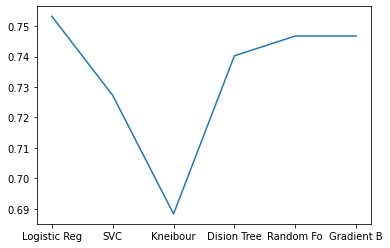

In [140]:
mpt.plot(result['Model'],result['Accuracy'])

C:\Users\dell\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

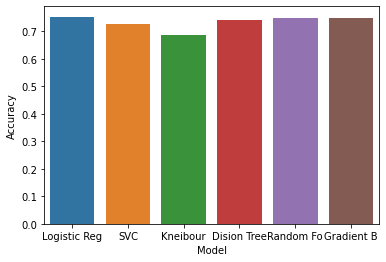

In [141]:
sb.barplot(result['Model'],result['Accuracy'])

In [48]:
#making prediction system using SVC

In [103]:
input_data=(4,110,92,0,0,37.6,0.191,30)
# change to numpy array
inpdata=np.array(input_data)
inpdata

array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
        30.   ])

In [104]:
# reshape data
inpdata=inpdata.reshape(1,-1)

In [105]:
inpdata

array([[  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]])

In [106]:
inpdata=scal.transform(inpdata)
inpdata

array([[ 0.04601433, -0.34096773,  1.18359575, -1.28821221, -0.69289057,
         0.71168975, -0.84827977, -0.27575966]])

In [107]:
fin=svm.predict(inpdata)
fin

array([0], dtype=int64)

In [109]:
def disp(fi):
    if(fi[0]==0):
        print ("Non Dibaetic");
    else:
        print ("Diabetic")

In [110]:
disp(fin)

Non Dibaetic


In [142]:
import joblib
joblib.dump(svm,'Diabetes')

['Diabetes']

In [144]:
model=joblib.load('Diabetes');

In [183]:
#GUI predictor
from tkinter import *
import joblib

In [186]:
def show():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=int(e8.get())
    model = joblib.load('Diabetes')
    fi=model.predict(scal.transform([[p1,p2,p3,p4,p5,p6,p7,p8]]))
    if fi[0] == 0:
        Label(master, text="No Diabetes").grid(row=31)
    else:
        Label(master, text="Has Diabetes").grid(row=31)                 


In [187]:
master = Tk()
master.title("Diabetes Disease Prediction System")


label = Label(master, text = "Diabetes Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)
Label(master, text="No of Pregnency ").grid(row=1)
Label(master, text="Glucose ").grid(row=2)
Label(master, text="Blood Pressure").grid(row=3)
Label(master, text="Skin Thickness").grid(row=4)
Label(master, text="Insulin level").grid(row=5)
Label(master, text="BMI").grid(row=6)
Label(master, text="Diabetes Prediction Function").grid(row=7)
Label(master, text="Age").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)

Button(master, text='Click Here to Predict', command=show).grid()

mainloop()
